In [30]:
import math as m
import matplotlib.pyplot as plt

In [31]:
def interchange_rows(eqs):
    new_sequence_of_eq = []
    for eq in eqs:
        for key in variables:
            if eq['x']>eq[key]:
                new_sequence_of_eq.insert(0,eq)
               # print(eq,"x")                
                break
            if eq['y']>eq[key]:
                new_sequence_of_eq.insert(1,eq)
                #print(eq,"y")
                break
            if eq['z']>eq[key]:
                new_sequence_of_eq.insert(2,eq)
               # print(eq,"z")
                break
    return new_sequence_of_eq

In [32]:
def x(row={},y=0,z=0):
    x = None
    x = (row["c"]-row["y"]*y-row["z"]*z)/row["x"]
    return x

def y(row={},x=0,z=0):
    y = None
    y = (row["c"]-row["x"]*x-row["z"]*z)/row["y"]
    return y

def z(row={},x=0,y=0):
    z = None
    z = (row["c"]-row["x"]*x-row["y"]*y)/row["z"]
    return z

In [34]:
variables = ["x","y","z","c"]
equations = []

for i in range(3):
    equations.append({})

for eq in equations:   
    val = [x for x in input('X, Y, Z, C : ').split(',')]
    val.reverse()
    for v in variables:
        eq[v] = float(val.pop())

equations = interchange_rows(equations)

X, Y, Z, C : 1,3,-1,11
X, Y, Z, C : 3,1,1,1
X, Y, Z, C : 1,-2,4,21


In [35]:
def display_values(*data):
    print(data)

In [36]:
print(equations)

[{'x': 3.0, 'y': 1.0, 'z': 1.0, 'c': 1.0}, {'x': 1.0, 'y': 3.0, 'z': -1.0, 'c': 11.0}, {'x': 1.0, 'y': -2.0, 'z': 4.0, 'c': 21.0}]


equations[0]["x"] = 3
equations[0]["y"] = 1
equations[0]["z"] = 1
equations[0]["c"] = 1

equations[1]["x"] = 1
equations[1]["y"] = 3
equations[1]["z"] = -1
equations[1]["c"] = 11

equations[2]["x"] = 1
equations[2]["y"] = -2
equations[2]["z"] = 4
equations[2]["c"] = 21

In [37]:
A = 0.0
B = 0.0
C = 0.0
X = 0.0
Y = 0.0
Z = 0.0

error = []

#tol = 1.1*m.exp(-2)
tol = 0.01

print("Jacobi's Method or Gauss Seidel Method")

choice = input("For Jacobi type 1 \nFor Gauss Seidel Type 2\n ")

if choice == '1':
    i=0
    #for i in range(8):
    while True:
        
        if i == 0:
            A = x(equations[0])
            B = y(equations[1])
            C = z(equations[2])
        else:
            X = x(equations[0],B,C)
            Y = y(equations[1],A,C)
            Z = z(equations[2],A,B)

            error.append(abs(X-A))
            
        i = i+1
        if (abs(X-A))<tol:
            del error[0]
            print(i,"---Iterations")
            break
            
        A,B,C = X,Y,Z
        
        display_values(A,B,C)
        
elif choice == '2':
    i=0
#     print(abs(X-A),1*m.exp(-3))
    #for i in range(8):
    while True:
        
        if i == 0:
            A = x(equations[0])
            B = y(equations[1],A)
            C = z(equations[2],A,B)
            
        else:
            X = x(equations[0],B,C)
            Y = y(equations[1],X,C)
            Z = z(equations[2],X,Y)

            error.append(abs(X-A))
        print(i)
        i = i+1
        if (abs(X-A))<tol:
            del error[0]
            print(abs(X-A),"--err")
            print(i,"---Iterations")
            break
            
        display_values(A,B,C)
        
        A,B,C = X,Y,Z

else:
    print("Invalid Selection !")

Jacobi's Method or Gauss Seidel Method
For Jacobi type 1 
For Gauss Seidel Type 2
 1
(0.0, 0.0, 0.0)
(0.3333333333333333, 3.6666666666666665, 5.25)
(-2.638888888888889, 5.305555555555555, 7.0)
(-3.7685185185185186, 6.87962962962963, 8.5625)
(-4.8140432098765435, 7.777006172839506, 9.631944444444445)
(-5.469650205761316, 8.481995884773662, 10.34201388888889)
(-5.941336591220851, 8.937221364883401, 10.85841049382716)
(-6.265210619570187, 9.266582361682671, 11.203944830246913)
(-6.490175730643195, 9.489718483272368, 11.449593835733882)
(-6.646437439668749, 9.646589855459025, 11.617403174296982)
(-6.754664343252003, 9.754613537988577, 11.7349042876467)
(-6.829839275211758, 9.829856210299567, 11.815972854807288)
(-6.881943021702285, 9.881937376673015, 11.872387923952722)
(-6.918108433541913, 9.918110315218335, 11.911454443762079)
(-6.943188252993472, 9.943187625767997, 11.938582265994647)
(-6.9605899639208815, 9.96059017299604, 11.957390876132367)
(-6.972660349709469, 9.972660280017749, 11.

In [38]:
error

[2.9722222222222223,
 1.1296296296296298,
 1.045524691358025,
 0.6556069958847726,
 0.47168638545953456,
 0.3238740283493362,
 0.22496511107300776,
 0.15626170902555447,
 0.10822690358325371,
 0.07517493195975522,
 0.05210374649052696,
 0.03616541183962774,
 0.025079819451558905,
 0.01740171092740983,
 0.012070385788587323,
 0.008373936122527681]

In [39]:
print(equations[0])
print(equations[1])
print(equations[2])

{'x': 3.0, 'y': 1.0, 'z': 1.0, 'c': 1.0}
{'x': 1.0, 'y': 3.0, 'z': -1.0, 'c': 11.0}
{'x': 1.0, 'y': -2.0, 'z': 4.0, 'c': 21.0}


In [40]:
A = x(equations[0])
B = y(equations[1])
C = z(equations[2])

In [41]:
print(A)
print(B)
print(C)

0.3333333333333333
3.6666666666666665
5.25


In [42]:
X = x(equations[0],B,C)
Y = y(equations[1],A,C)
Z = z(equations[2],A,B)

In [43]:
print(X)
print(Y)
print(Z)

-2.638888888888889
5.305555555555555
7.0


In [48]:
print(error)
del error[0]
print(error)

[0.3333333333333333, 2.9722222222222223, 1.1296296296296298, 1.045524691358025, 0.6556069958847726, 0.47168638545953456, 0.3238740283493362]
[2.9722222222222223, 1.1296296296296298, 1.045524691358025, 0.6556069958847726, 0.47168638545953456, 0.3238740283493362]


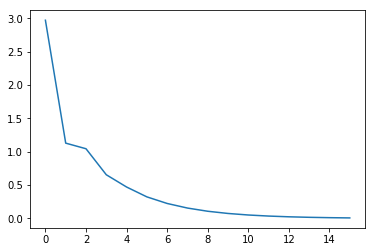

In [44]:
plt.plot(error)
plt.show()